In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set plot style
sns.set(style="whitegrid")

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
titanic=pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("Shape : ",titanic.shape)
print("Size : ",titanic.size)
print("Columns : ",titanic.columns.values)

Shape :  (891, 12)
Size :  10692
Columns :  ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.describe([0,0.05,0.50,0.95,0.99,1]).T

,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
PassengerId,891.0,446.000000,257.353842,1.00,1.00,45.500,446.0000,846.50000,882.10000,891.0000,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.00,0.000,0.0000,1.00000,1.00000,1.0000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,1.00,1.000,3.0000,3.00000,3.00000,3.0000,3.0000
Age,714.0,29.699118,14.526497,0.42,0.42,4.000,28.0000,56.00000,65.87000,80.0000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.00,0.000,0.0000,3.00000,5.00000,8.0000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.00,0.000,0.0000,2.00000,4.00000,6.0000,6.0000
Fare,891.0,32.204208,49.693429,0.00,0.00,7.225,14.4542,112.07915,249.00622,512.3292,512.3292


In [7]:
titanic.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,NaN,C
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
616,617,0,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.4000,NaN,S
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,NaN,S
767,768,0,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.7500,NaN,Q
651,652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,NaN,S
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S
178,179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0000,NaN,S
108,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S


<div style="border:2px solid #4f46e5; background-color:#f9f9ff; padding:20px; border-radius:12px; font-size:15px; font-family:Arial, sans-serif; color:#1f2937;">
  <h2 style="color:#4f46e5; margin-top:0;">Titanic Dataset: Variable Classification</h2>

  <h3 style="margin-bottom:8px;">📊 Categorical Variables</h3>
  <ul style="margin-top:0;">
    <li><strong>Ordinal:</strong> <span style="color:#374151;">Pclass</span></li>
    <li><strong>Nominal:</strong> <span style="color:#374151;">Survived, Sex, Ticket, Cabin, Embarked</span></li>
    <li><strong>Text:</strong> <span style="color:#374151;">Name</span></li>
  </ul>

  <h3 style="margin-bottom:8px;">🔢 Numerical Variables</h3>
  <ul style="margin-top:0;">
    <li><strong>Continuous:</strong> <span style="color:#374151;">Age, Fare</span></li>
    <li><strong>Discrete:</strong> <span style="color:#374151;">SibSp, Parch</span></li>
    <li><strong>Identifier:</strong> <span style="color:#374151;">PassengerId</span></li>
  </ul>
</div>


In [8]:
# Show summary statistics only for object-type columns (i.e., categorical/text features)
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<div style="border:2px solid #4f46e5; background-color:#f9f9ff; padding:20px; border-radius:12px; font-family:Arial, sans-serif; color:#1f2937; line-height:1.6;">
  <h2 style="color:#4f46e5; margin-top:0;">Titanic Dataset – Data Quality  Notes</h2>

  <h3>1. Mixed Data Types</h3>
  <ul>
    <li><strong>Ticket:</strong> Contains both letters and numbers (e.g., <code>A/5 21171</code>). Splitting into prefix and numeric part would improve consistency.</li>
    <li><strong>Cabin:</strong> Alphanumeric values (e.g., <code>C85</code>, <code>B57 B59 B63 B66</code>). Deck information can be extracted, and multiple entries should be handled properly.</li>
  </ul>

  <h3>2. Irregular or Inconsistent Fields</h3>
  <ul>
    <li><strong>Name:</strong> Appears in several formats:
      <ul>
        <li>Titles: <code>Mr.</code>, <code>Mrs.</code>, <code>Dr.</code></li>
        <li>Parentheses for alternative names: <code>Mrs. John (Florence Briggs Thayer)</code></li>
        <li>Quotation marks for nicknames: <code>William 'Bill' Smith</code></li>
      </ul>
      These variations should be reviewed for standardization and potential feature extraction.
    </li>
  </ul>


<div style="border:2px solid #4f46e5; background:#0000; padding:20px; border-radius:12px; font-font-family:Arial, sans-serif; line-height:1.6;">
      <h2 style="color:4f46e5; margin-top:0;">Handling Null Values</h2>
</div>

In [9]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
missing_cnt = titanic.isna().sum().sort_values(ascending=False)
missing_pct = (titanic.isna().mean()*100).sort_values(ascending=False)
missing_report = pd.DataFrame({"Null Values": missing_cnt, "Null_%": missing_pct.round(2)})
print("\n>>> Null Values Report:")
display(missing_report)


>>> Null Values Report:


,Null Values,Null_%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


In [11]:
#The 'Cabin' column contains numerous null values, so we will drop it.
titanic.drop(columns= ["Cabin"],inplace=True)

In [12]:
titanic['Embarked'].fillna('S',inplace=True)

In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [14]:
# Extract Title from Name column
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.')
titanic[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [15]:
titanic["Title"].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [16]:
#Standardize similar titles into common groups
# "Mlle" (French for Mademoiselle) and "Ms" mean "Miss"
# -> Group them under "Miss"
titanic['Title'] = titanic["Title"].replace(['Mlle','Ms'],'Miss')

# "Mme" (French for Madame) means "Mrs"
# -> Group it under "Mrs"
titanic['Title'] = titanic['Title'].replace(['Mme'],'Mrs')

# -------------------------------------------------------
# Step 2: Combine rare/uncommon titles into a single group
# Examples:
# - Female nobility: Lady, Countess, Dona
# - Male nobility: Sir, Jonkheer, Don
# - Military ranks: Capt, Col, Major
# - Professions: Dr, Rev
# These categories have very few samples each, so it is
# better to group them together as "Rare"
titanic['Title'] = titanic['Title'].replace([
    'Lady','Countess','Capt','Col','Don','Dr',
    'Major','Rev','Sir','Jonkheer','Dona'],'Rare')

# -------------------------------------------------------
# Result:
# - Main categories: Mr, Miss, Mrs, Master
# - Rare categories grouped into "Rare"
# This reduces cardinality and helps in imputing Age
# based on more reliable median values per Title group.


In [17]:
titanic['Age'] = titanic.groupby('Title')['Age']\
                          .transform(lambda x: x.fillna(x.median()))

print(titanic.groupby('Title')['Age'].median())

Title
Master     3.5
Miss      21.0
Mr        30.0
Mrs       35.0
Rare      48.5
Name: Age, dtype: float64


In [18]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

<div style="border:2px solid #4f46e5; background:#0000; padding:20px; border-radius:12px; font-font-family:Arial, sans-serif; line-height:1.6;">
      <h2 style="color:#4f46e5; margin-top:0;">Creating and Categorizing Family Size Feature</h2>
</div>

In [19]:
titanic['Family_size']=titanic['SibSp'] + titanic['Parch'] + 1
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family_size
344,345,0,2,"Fox, Mr. Stanley Hubert",male,36.0,0,0,229236,13.0000,S,Mr,1
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C,Miss,1
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,S,Miss,1
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,S,Mr,1
362,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.4542,C,Mrs,2
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,S,Mrs,2
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,S,Mr,1
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,35.0,1,0,17453,89.1042,C,Mrs,2
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,35.0,1,0,2689,14.4583,C,Mrs,2
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.5250,S,Mrs,3


In [20]:
def family_size(number):
    if number==1:
        return "Alone"
    elif number>1 and number <5:
        return "Small"
    else:
        return "Large"

In [21]:
titanic['Family_size']=titanic['Family_size'].apply(family_size)
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family_size
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C,Mr,Alone
487,488,0,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,C,Mr,Alone
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,S,Miss,Small
517,518,0,3,"Ryan, Mr. Patrick",male,30.0,0,0,371110,24.1500,Q,Mr,Alone
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C,Miss,Alone
222,223,0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,S,Mr,Alone
294,295,0,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,S,Mr,Alone
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,35.0,0,2,2668,22.3583,C,Mrs,Small
492,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,S,Mr,Alone
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,S,Mr,Small


<div style="border:2px solid #4f46e5; background:#0000; padding:20px; border-radius:12px; font-font-family:Arial, sans-serif; line-height:1.6;">
      <h4 style="color:#4f46e5; margin-top:0;">Data Preprocessing – Convert Age to Integer</h4>
</div>


In [22]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Title           object
Family_size     object
dtype: object

In [23]:
titanic["Age"] = titanic["Age"].astype("int64")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
 12  Family_size  891 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 90.6+ KB


In [24]:
def age_cat(number):
    if number <=2:
        return "Baby"
    elif number > 2 and number <= 12:
        return "Child"
    elif number >12 and number <=18:
        return "Teenager"
    elif number > 18 and number <30:
        return "Young"
    elif number>30 and number <50:
        return "Middle-age"
    else:
        return "Old"

titanic["Age_cat"]=titanic["Age"].apply(age_cat)

In [25]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family_size,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,Mr,Small,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,Mrs,Small,Middle-age
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,Miss,Alone,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,Mrs,Small,Middle-age
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,Mr,Alone,Middle-age


<div style="border:2px solid #4f46e5; background:#0000; padding:20px; border-radius:12px; font-font-family:Arial, sans-serif; line-height:1.6;">
      <h4 style="color:#4f46e5; margin-top:0;">Categorical Variable Analysis</h4>
</div>


In [26]:
cat_cols=["Pclass","Sex","Embarked","Family_size","Title","Age_cat"]
def cat_summary(dataframe,col_name):
    print(pd.DataFrame({"People":dataframe[col_name].value_counts(),
                       "Ratio":100 * dataframe[col_name].value_counts()/len(dataframe)}))
    print("------------------------------------------------")
for col in cat_cols:
    cat_summary(titanic,col)

        People      Ratio
Pclass                   
3          491  55.106622
1          216  24.242424
2          184  20.650954
------------------------------------------------
        People      Ratio
Sex                      
male       577  64.758698
female     314  35.241302
------------------------------------------------
          People      Ratio
Embarked                   
S            646  72.502806
C            168  18.855219
Q             77   8.641975
------------------------------------------------
             People      Ratio
Family_size                   
Alone           537  60.269360
Small           292  32.772166
Large            62   6.958474
------------------------------------------------
        People      Ratio
Title                    
Mr         517  58.024691
Miss       185  20.763187
Mrs        126  14.141414
Master      40   4.489338
Rare        23   2.581369
------------------------------------------------
            People      Ratio
Age_cat       

<div style="border:2px solid #4f46e5; background:#0000; padding:20px; border-radius:12px; font-font-family:Arial, sans-serif; line-height:1.6;">
      <h4 style="color:#4f46e5; margin-top:0;">Numerical Variable Analysis</h4>
</div>


In [27]:
num_cols=["Age","Fare"]
def num_summary(dataframe,num_col):
    quantiles=[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99]
    print(dataframe[num_col].describe(quantiles).T)
    print("--------------------------------")

for col in num_cols:
    num_summary(titanic,col)

count    891.000000
mean      29.373737
std       13.280405
min        0.000000
5%         5.000000
10%       16.000000
20%       20.000000
30%       22.000000
40%       26.000000
50%       30.000000
60%       30.000000
70%       34.000000
80%       38.000000
90%       48.000000
95%       54.000000
99%       65.000000
max       80.000000
Name: Age, dtype: float64
--------------------------------
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: Fare, dtype: float64
--------------------------------


<div style="border:2px solid #4f46e5; background:#0000; padding:20px; border-radius:12px; font-font-family:Arial, sans-serif; line-height:1.6;">
      <h4 style="color:#4f46e5; margin-top:0;">Target Variable Analysis</h4>
</div>


In [28]:
TARGET="Survived"
def target_summary_with_cat(dataframe,target,categorical_col):
    print(pd.DataFrame({"Target_Mean": dataframe.groupby(categorical_col)[target].mean()}),end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(titanic,TARGET,col)

        Target_Mean
Pclass             
1          0.629630
2          0.472826
3          0.242363


        Target_Mean
Sex                
female     0.742038
male       0.188908


          Target_Mean
Embarked             
C            0.553571
Q            0.389610
S            0.339009


             Target_Mean
Family_size             
Alone           0.303538
Large           0.161290
Small           0.578767


        Target_Mean
Title              
Master     0.575000
Miss       0.702703
Mr         0.156673
Mrs        0.793651
Rare       0.347826


            Target_Mean
Age_cat                
Baby           0.625000
Child          0.551020
Middle-age     0.449393
Old            0.231818
Teenager       0.428571
Young          0.384342




In [29]:
titanic[["Pclass","Survived"]].groupby("Pclass").mean().sort_values(by="Survived",ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [30]:
titanic[["Sex","Survived"]].groupby(["Sex"]).mean().sort_values(by="Survived",ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [31]:
titanic[["Family_size","Survived"]].groupby("Family_size").mean().sort_values(by="Survived",ascending=False)

,Survived
Family_size,
Small,0.578767
Alone,0.303538
Large,0.161290


In [32]:
titanic[["Pclass","Survived"]].groupby("Pclass").mean().sort_values(by="Survived",ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [33]:
titanic[["Embarked","Survived"]].groupby("Embarked").mean().sort_values(by="Survived",ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [34]:
titanic.groupby(['Sex','Pclass'])['Survived'].mean()


Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [35]:
titanic.groupby(['Sex','Embarked'])['Survived'].mean().unstack()


Embarked,C,Q,S
Sex,,,
female,0.876712,0.750000,0.692683
male,0.305263,0.073171,0.174603


In [36]:
titanic.groupby(['Sex','Age_cat'])['Survived'].mean()

Sex     Age_cat   
female  Baby          0.600000
        Child         0.590909
        Middle-age    0.793814
        Old           0.852941
        Teenager      0.750000
        Young         0.704348
male    Baby          0.642857
        Child         0.518519
        Middle-age    0.226667
        Old           0.118280
        Teenager      0.088235
        Young         0.162651
Name: Survived, dtype: float64

In [37]:
pd.pivot_table(titanic, values='Survived', index=['Sex','Pclass','Family_size'], aggfunc='mean')


Survived
Sex    Pclass Family_size          
female 1      Alone        0.970588
              Large        1.000000
              Small        0.964286
       2      Alone        0.906250
              Large        1.000000
              Small        0.928571
       3      Alone        0.616667
              Large        0.111111
              Small        0.561404
male   1      Alone        0.333333
              Large        0.000000
              Small        0.444444
       2      Alone        0.097222
              Small        0.277778
       3      Alone        0.121212
              Large        0.037037
              Small        0.250000

<div style="border:2px solid #4f46e5; background:#0000; padding:20px; border-radius:12px; font-font-family:Arial, sans-serif; line-height:1.6;">
      <h2 style="color:#4f46e5; margin-top:0;">Exploratory Data Visualization</h2>
</div>


In [38]:
import plotly.express as px
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Histogram(x=titanic[titanic['Survived']==0]['Age'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=titanic[titanic['Survived']==1]['Age'], name='Survived', opacity=0.5))

fig.update_layout(
    title='Age Distribution by Survival',
    xaxis_title='Age',
    yaxis_title='Density',
    barmode='overlay',  
    bargap=0.1, 
)

fig.show()


In [39]:

fig = go.Figure()

fig.add_trace(go.Histogram(x=titanic[titanic['Survived']==0]['Family_size'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=titanic[titanic['Survived']==1]['Family_size'], name='Survived', opacity=0.5))

fig.update_layout(
    title='Family Size Distribution by Survival',
    xaxis_title='Family_size',
    yaxis_title='Density',
    barmode='overlay',  
    bargap=0.1, 
)

fig.show()


In [40]:

fig = go.Figure()

fig.add_trace(go.Histogram(x=titanic[titanic['Survived']==0]['Pclass'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=titanic[titanic['Survived']==1]['Pclass'], name='Survived', opacity=0.5))

fig.update_layout(
    title='Pclass Distribution by Survival',
    xaxis_title='Pclass',
    yaxis_title='Density',
    barmode='overlay',  
    bargap=0.1, 
)

fig.show()


In [41]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=titanic[titanic['Survived'] == 0]['Fare'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=titanic[titanic['Survived'] == 1]['Fare'], name='Survived', opacity=0.5))

fig.update_layout(
    title='Fare Distribution by Survival',
    xaxis_title='Fare',
    yaxis_title='Density',
    barmode='overlay',  
    bargap=0.1,  
)

fig.show()

In [42]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=titanic[titanic['Survived'] == 0]['Embarked'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=titanic[titanic['Survived'] == 1]['Embarked'], name='Survived', opacity=0.5))

fig.update_layout(
    title='Embarked Distribution by Survival',
    xaxis_title='Embarked',
    yaxis_title='Density',
    barmode='overlay',  
    bargap=0.1,  
)

fig.show()

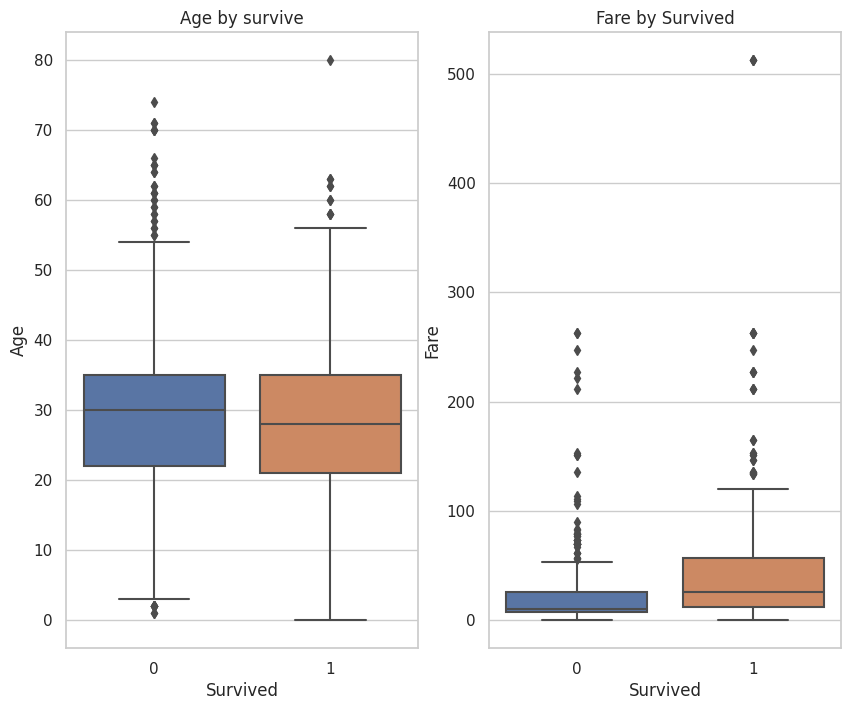

In [43]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(x="Survived",y="Age",data=titanic)
plt.title("Age by survive")
plt.xlabel("Survived")
plt.ylabel("Age")

plt.subplot(1,2,2)
sns.boxplot(x="Survived",y="Fare",data=titanic)
plt.title("Fare by Survived")
plt.xlabel("Survived")
plt.ylabel("Fare")

plt.show()

In [44]:
fig = px.scatter_3d(titanic, x='Fare', y='Sex', z='Age',
                    color='Survived')
fig.show()


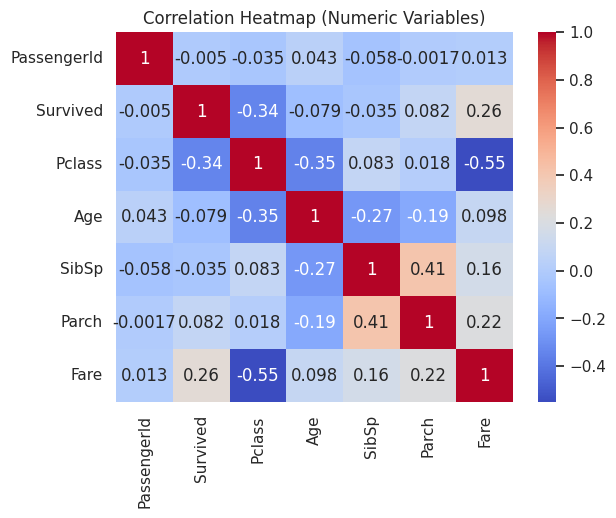

In [45]:
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Variables)")
plt.show()


<section id="conclusion">
  <h2>Conclusion (Titanic EDA)</h2>
  <p>
    From the analysis of the Titanic dataset, several consistent patterns explain survival likelihood:
  </p>
  <ul>
    <li> Females had substantially higher survival rates than males.</li>
    <li>Children survived more often than adults, reflecting “women and children first.”</li>
    <li>1st-class passengers had the highest survival rates; 3rd-class the lowest.</li>
    <li>Among men, embarking at <em>Cherbourg</em> corresponded to better outcomes than Southampton or Queenstown.</li>
    <li> Traveling with a <em>small</em> family (1–3 relatives) was better than being alone or in very large groups.</li>
    <li>Higher fares (a proxy for wealth/class) aligned with higher survival odds.</li>
  </ul>
  <p>
    Overall, survival on the Titanic was not random—it arose from a blend of social, demographic, and economic factors: gender, age, class, embarkation port, family structure, and fare all played critical roles.
  </p>
</section>
